## Admin Script for DHSEM ArcGIS Online  
<p> Date Created: May 19th 2021 </p> 
<p> Goal:Pull inventory monthly of all content within DHSEM Org. May add additional admin tasks as appropriate </p>

### Table of Contents 
1.) [Admin Tasks Overview](#admintasks)  
  <ul> 1.a) [Generate Report of All Accounts](#reportaccounts)
   
  1.b) [Generate Report of All items](#reportitems)</ul>
   
2.) [Inventory Of Individual ArcGIS Online Users](#invetory) 

In [25]:
# import libraries 
import arcgis 
from arcgis.gis import GIS
import pandas as pd 
import numpy as np 
import tempfile 
import os

In [26]:
# Step 1: Login into ArcGIS Online. 
gis = GIS("https://dhsem.maps.arcgis.com/home/index.html", username='rstevenson88@DHSEM')
print("Successfully logged in as: " + gis.properties.user.username)

Enter password: ········
Successfully logged in as: rstevenson88@DHSEM


### Admin Tasks <a name="admintasks"></a>
<p>Tasks:
    <ul> 1.) Get report of all accounts Within DHSEM Org </ul>
    <ul> 2.) Get Inventory List of items within DHSEM Org </ul> 
    <ul> 3.) Download Items related to an incident - Coming Soon!</ul> </p> 

#### Generate a Report of All Accounts <a name="reportaccounts"></a>  

In [11]:
# Generate a report for all users . 
gis.admin.usage_reports.generate_report(focus='org', report_type='users', duration='weekly',notify=True)
# this creates a report in your content on AGOL.  
# Run this once a Month on the first work day of the Month. 

exception calling callback for <Future at 0x2618b80d310 state=finished raised AttributeError>
Traceback (most recent call last):
  File "C:\Users\rstevenson\.conda\envs\DHSEMGIS\lib\concurrent\futures\_base.py", line 408, in add_done_callback
    fn(self)
  File "C:\Users\rstevenson\.conda\envs\DHSEMGIS\lib\site-packages\arcgis\_impl\_async\jobs.py", line 87, in _notify
    jobid = self._jobid
AttributeError: 'ItemStatusJob' object has no attribute '_jobid'


<Generate Report job>

<Item title:"OrganizationMembers_2021-05-21" type:Administrative Report owner:rstevenson88@DHSEM>
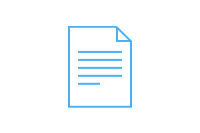

In [13]:
Users = gis.content.get('a738f0f7813047c48749d22d3013af31')
Users

In [12]:
# Not sure where to put this. 
# Last time I ran the .get_data() function, it saved the file
# in a location  on my C drive in a Temp file. 
# this isnt what I want so lets change where temp files go. 
# dirname, basename = os.path.split('inventory_May')
# temp = tempfile.NamedTemporaryFile(prefix=basename, dir=r'.\Data for Python')
# print(temp.name)

In [14]:
# download the report
# This works, but why does it go to a path that isnt determined by the env? 
Users.get_data()

'C:\\Users\\RSTEVE~1\\AppData\\Local\\Temp\\OrganizationMembers_2021-05-21.csv'

In [16]:
# after you download the file in the TEMP folder. (lame) 
# Delete the file from your content. 
# you just created content, so delete these files 
# so they arent apart of your monthly inventory. 
Users.delete()
# if it returns true it works. 

True

#### Generate Report of All items within DHSEM Org <a name="reportitems"></a>

In [36]:
# Follow similar steps for pulling all user accounts. 
# generate report for content within DHSEM Org 
gis.admin.usage_reports.generate_report(focus='org', report_type='content', duration='weekly',notify=True)

exception calling callback for <Future at 0x2618b9c4850 state=finished raised AttributeError>
Traceback (most recent call last):
  File "C:\Users\rstevenson\.conda\envs\DHSEMGIS\lib\concurrent\futures\_base.py", line 408, in add_done_callback
    fn(self)
  File "C:\Users\rstevenson\.conda\envs\DHSEMGIS\lib\site-packages\arcgis\_impl\_async\jobs.py", line 87, in _notify
    jobid = self._jobid
AttributeError: 'ItemStatusJob' object has no attribute '_jobid'


<Generate Report job>

<Item title:"OrganizationItems_2021-05-21" type:Administrative Report owner:rstevenson88@DHSEM>
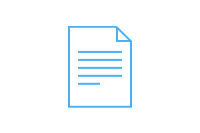

In [42]:
# add content to your notebook 
Items = gis.content.get('00bf28cb30434dcf9700606979a9e345')
Items

In [43]:
# Download the report
Items.get_data()

'C:\\Users\\RSTEVE~1\\AppData\\Local\\Temp\\OrganizationItems_2021-05-21.csv'

In [44]:
#delete the report from contents
Items.delete()

True

### <u> Inventory Of Individual ArcGIS Online Users </u> <a name="invetory"></a>

<h4>  Inventory Script - ESRI GeoNet Community Solution </h4> 
<p> This script outputs  a series of csvs for all users and their items that were created. This is overkill and isnt needed because not all users have accounts where they can create items within AGOL.  </p>
<p> This link has a script within in it, it doesnt work that great, but it is a starting point.Doesnt seem to pull my inventory, will need to make tweaks </p> 
<a href = 'https://community.esri.com/t5/arcgis-api-for-python-questions/get-a-list-of-all-arcgis-items-with-arcgis-python-module/td-p/812415/highlight/true'> This script iterates through users content. </a> 

In [28]:
users_all = gis.users.search() 

def get_item(user):
    list_items = {}
    content_item = user.items()
    for item in content_item:
             list_items[item.itemid] = item
      
    folders = user.folders
    for folder in folders :
            folder_items = user.items(folder=folder['title'])
            for item in folder_items:
                     list_items[item.itemid] = item
    pd.DataFrame(list_items).transpose().to_excel(str(user.username)+'.xlsx')

for i in range(len(users_all)):
    print("extract "+ str(users_all[i]) + "data to excel...")
    get_item(users_all[i])

extract <User username:alexis_nagel@VTF>data to excel...
extract <User username:alex_barba@VTF>data to excel...
extract <User username:Amy.Black@DHSEM>data to excel...
extract <User username:amy_herron@VTF>data to excel...
extract <User username:andrew_pollart@VTF>data to excel...
extract <User username:annie_giangardella@VTF>data to excel...
extract <User username:annmarie_harris@CDPHE>data to excel...
extract <User username:anthony_leibig@DHSEM>data to excel...
extract <User username:april_burdorf@CDPHE>data to excel...
extract <User username:BLucero_DHSEM>data to excel...
extract <User username:brandy_emily@DHSEM>data to excel...
extract <User username:Brett.Lawler@DHSEM>data to excel...
extract <User username:bsalexander@DHSEM>data to excel...
extract <User username:cbbennet@DHSEM>data to excel...
extract <User username:CColeman@DHSEM>data to excel...
extract <User username:cheryl_mcmahon@CDPHE>data to excel...
extract <User username:christopherhudak@DHSEM>data to excel...
extract 